Heap's law and Zipf's law to predict vocabulary size from corpus size
-------------------------------------------------------------------------------

In this assignment you will produce some plots which look similar to the plots shown in the book in Figure 5.1 and 5.2. However, you will count and predict the vocabulary size for the collected works of Shakespeare and Sherlock Holmes instead of using Reuters RCV-1.

This week you will use the `matplotlib` python library to produce some plots. We will give you a template that you can use to plot the actual and the predicted vocabulary size for the two corpus.

In [1]:
import sys
sys.path.append("../../")

In [2]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import glob
from textutils import tokenize_document

Heap's law
------------

The first part of this exercise is to compute the data points for plotting the "actual" vocabulary size in a format matching the predictions produced by Heap's law by going through the corpus and counting tokens and unique tokens.

The method `empirical_heaps_stats` should produce a list of pairs of the form `(token_count, vocabulary_count)` and there should be an element in the list for each distinct value of `vocabulary_count`.

In [4]:
def empirical_heaps_stats(doc):
    vocabulary = set()
    heaps_points = []
    
    token_count = 0
    vocabulary_count = 0

    for word in tokenize_document(doc):
        ### <assignment>
        token_count += 1
        if word not in vocabulary:
            vocabulary.add(word)
            vocabulary_count += 1
            heaps_points.append((token_count, vocabulary_count))
        ### </assignment>
    return heaps_points

Now we can call the method `empirical_heaps_stats` for each document

In [5]:
shakespeare_heaps_stats = empirical_heaps_stats('../../shared/full_corpus/full_shakespeare.txt')
sherlock_holmes_heaps_stats = empirical_heaps_stats('../../shared/full_corpus/full_sherlock_holmes.txt')

The next bit of coding that we need is an implementation of the formula for Heap's law, which is $M = k*T^b$. The method you are asked to implement gets a list of different values for $T$ in `x` and the parameters `k` and `b` as arguments.

You can assume that `x` is a numpy array, which supports element-wise mathematical operations using the standard python operators, e.g. `x * 5` would multiply every element of `x` with 5 and produce a new numpy array containing the results.

In [6]:
def heaps_law(x, k, b):
    '''
    Compute Heap's law (Equation 5.1) for each element of x.
    
    You can assume that x is a numpy array, which supports element-wise mathematical
    operations using the standard python operators, e.g. x * 5 would multiply every element of x by 5
    and produce a new numpy array containing the results.
    
    Should return a numpy array of Heap's law values for each element of x.
    '''
    ### <assignment>
    return k * (x ** b)
    ### </assignment>

We provide you with a function `plot_heaps_stats` which produces a plot similar to the one in the book in Figure 5.1. Note that `k` and `b`, the parameters for Heaps's law are once again arguments to the function.

The plot function creates a log-log plot of the counted vocabulary size and the predicted vocabulary size according to Heap's law for a number of token counts.

In [7]:
def plot_heaps_stats(heaps_points, k, b):
    # Convert the list of pairs given as heaps_points into two numpy arrays which are suitable for plotting
    x, y = map(np.array, zip(*heaps_points))
    min_x, max_x = min(x), max(x)

    # make the data logarithmic for both axes
    x_log, y_log = map(np.log10, [x, y])
    # plot the actual data as log-log plot
    plt.plot(x_log, y_log)

    # plot the Heap's law approximation for the same x-axis values as we have real data points
    if k != 0 and b != 0:
        plt.plot(np.log10(x), np.log10(heaps_law(x,k,b)))
    
    # Add axis labels
    plt.xlabel("log10 T")
    plt.ylabel("log10 M")

Now, you need to choose good values for k and b for predicting the vocabulary size for Shakespeare's works. As soon as you set `k` and `b` other than `0`, the prediction according to Heap's law will be plotted alongside the counted values.

While the book is rather short on details, the best approach for fitting the prediction to the computed values is to choose starting values for $k$ and $b$ that are in the ranges which the book suggests are typical for the parameters, that is $30 \le k \le 100$ and $b \approx 0.5$, visually inspect the plot and adjust the values for $k$ and $b$ until you are happy with the fit.

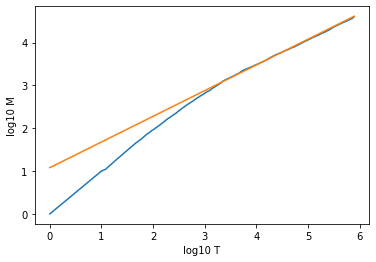

In [8]:
### <assignment>
shakespeare_heaps_k = 12
shakespeare_heaps_b = 0.6
### </assignment>
plot_heaps_stats(shakespeare_heaps_stats, shakespeare_heaps_k, shakespeare_heaps_b)

You may notice that you are struggling to fit the predicted vocabulary size using Heap's law with $b=0.5$ to the computed vocabulary size for the Shakespeare corpus. Note that the values the book suggests may not work for every corpus.

Can you think of a reason why a corpus may need parameters $k$ and $b$ outside the ranges suggested by the book?

Now you can plot the computed and predicted vocabulary sizes for the Sherlock Holmes corpus.

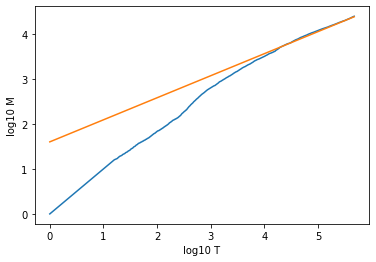

In [9]:
### <assignment>
sherlock_holmes_heaps_k = 40
sherlock_holmes_heaps_b = 0.49
### </assignment>
plot_heaps_stats(sherlock_holmes_heaps_stats, sherlock_holmes_heaps_k, sherlock_holmes_heaps_b)

Finally, you can also have both pairs of curves in the same plot

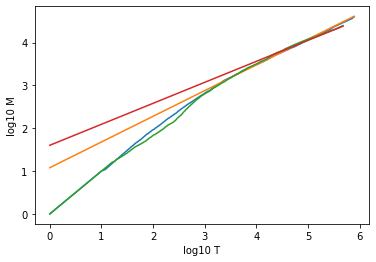

In [10]:
plot_heaps_stats(shakespeare_heaps_stats, shakespeare_heaps_k, shakespeare_heaps_b)
plot_heaps_stats(sherlock_holmes_heaps_stats, sherlock_holmes_heaps_k, sherlock_holmes_heaps_b)

Zipf's law
------------

Now, for producing the Zipf's law plots, we need slightly different data. For Zipf's law, we need to compute the overall token count and the frequency of each word in the vocabulary.

In [11]:
def empirical_zipf_stats(doc):
    frequency = dict()
    token_count = 0

    for word in tokenize_document(doc):
        ### <assignment>
        token_count += 1
        frequency[word] = frequency.get(word, 0) + 1
        ### </assignment>
    
    return (token_count, frequency)

Now we can call `empirical_zipf_stats` on both document collections.

In [12]:
shakespeare_token_count, shakespeare_zipf_stats = empirical_zipf_stats('../../shared/full_corpus/full_shakespeare.txt')
sherlock_holmes_token_count, sherlock_holmes_zipf_stats = empirical_zipf_stats('../../shared/full_corpus/full_sherlock_holmes.txt')

Next we need to define a function which computes term frequency predictions according to Zipf's law, which is given in Equation 5.2 and a method of computing these frequencies using the power law is described in the paragraph after the equation.

Note that the constant $c$ is defined in section 5.3.2 of the book to be "[...] a different constant $c$ such that the fractions $\frac{c}{i}$ are relative frequencies and sum to 1 (that is, $\frac{c}{i} = \frac{cf_i}{T}$)."
$c$ is then given as $1 = \sum_{i=1}^M \frac{c}{i} = c \sum_{i=1}^M \frac{1}{i} = c H_M$ and therefore $c = \frac{1}{H_M}$ where $H_M$ is the Mth harmonic number which can be approximated as $H_M \approx ln(M)$.

However for Zipf's law, we want to use the non-normalized variant of $c$ which is simply $c * T$.

For the method `zipfs_law`, which gets a numpy array of term index values for which to compute the predicted frequency, a overall token count in `token_count` and the list of counted frequencies in `frequency`, you should compute the predicted frequencies as $log cf_i$ for each $i$ in `x` and return them in a numpy array. Remember that basic mathematical operations can be executed on numpy arrays using the usual python operators and logarithms can be computed using `np.log` for the natural logarithm and `np.log10` for the base-10 logarithm for both numbers and numpy arrays.

In [13]:
def zipfs_law(x, token_count, frequency):
    ### <assignment>
    c = 1 / np.log(len(frequency))
    print("c = {}".format(c))
    return np.log10(c * token_count) - np.log10(x)
    ### </assignment>

We give you a method which plots both the counted and predicted term frequencies for a given data set.

In [14]:
def plot_zipf_stats(token_count, frequency):
    # Drop all words with frequency 1 from the list to make the plot more useful
    zipf_frequencies = list(c for w, c in frequency.items() if c > 1)
    # Sort frequencies in descending order
    zipf_frequencies.sort(reverse=True)
    # produce a list of pairs of (i, zipf_frequencies[i-1])
    zipf_frequencies = list(enumerate(zipf_frequencies, 1))
    
    # convert list of pairs into two numpy arrays for plotting
    x, y = map(np.array, zip(*zipf_frequencies))
    min_x, max_x = min(x), max(x)

    # y_norm = y / token_count
    x_log, y_log = map(np.log10, [x, y])
    plt.plot(x_log, y_log)

    plt.plot(np.log10(x), zipfs_law(x, token_count, frequency))

    plt.xlabel("log10 T")
    plt.ylabel("log10 M")

Now you can plot the token frequencies for Shakespeare's works

c = 0.09442926491596584


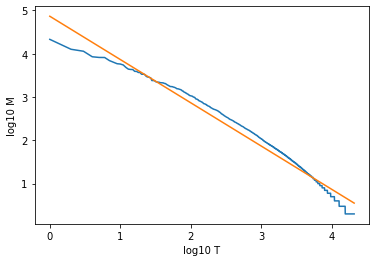

In [15]:
plot_zipf_stats(shakespeare_token_count, shakespeare_zipf_stats)

You can also plot the token frequencies for Sherlock Holmes

c = 0.09882200622821101


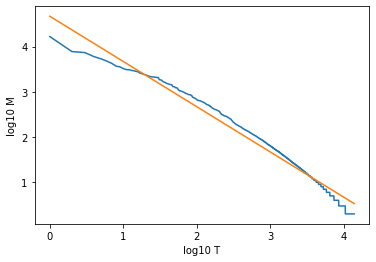

In [16]:
plot_zipf_stats(sherlock_holmes_token_count, sherlock_holmes_zipf_stats)

Finally, you can plot the token frequencies for both document collections in a single plot.

c = 0.09442926491596584
c = 0.09882200622821101


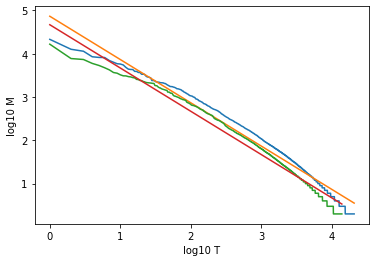

In [17]:
plot_zipf_stats(shakespeare_token_count, shakespeare_zipf_stats)
plot_zipf_stats(sherlock_holmes_token_count, sherlock_holmes_zipf_stats)